# Projet Equation aux dérivées partielles : étude de l'écoulement du sang autour d'un caillot sanguin.

<img src="Files/logo_cs.png" width="300" height="150">
<img src="Files/sanghomme.jpg" width="300" height="150">


##  Tanguy Colleville

## Sommaire 

- Introduction 
- Modélisation du problème 
- Formulation variationnelle 
- Simulation Fenics 
- Interprétation des résultats 
- Conclusion
- Références bibliographiques

Pour tout problème relatif à l'execution du notebook : tanguy.colleville@student-cs.fr


## 1. Introduction
Le sang joue un rôle prépondérant dans le bon fonctionnement de l'organisme. Ce dernier est acheminé par les vaisseaux sanguins, qui ont des dimensions variables, en fonction de leurs rôles et de leurs distances au cœur. A la suite d'une lésion d'un vaisseau, des masses solides de cellules sanguines s'agglutinent pour former des caillots, appelés thrombus. Ces derniers ont pour but de prévenir de l'hémorragie en colmatant la fuite. Nonobstant, il arrive que ces thrombus obstruent la circulation sanguine ainsi que l'apport d'oxygène vers un organe, ce qui peut causer une lésion dans les tissus, c'est l'_infarctus_. Aussi, lorsque les caillots se détachent de la zone colmatée, on parle d'_embolie_. Ces caillots peuvent avoir des conséquences puisqu'ils sont responsables des accidents vasculaires cérébraux et des crises cardiaques. C'est pourquoi, on se propose d'étudier, dans un premier temps l'écoulement du sang autour d'un caillot de sang, et dans un deuxième temps, l'écoulement autour de plusieurs caillots qui viennent obstruer le vaisseau sanguin.

Quelques ordres de grandeurs sont données ci-dessous à titre indicatif : 
- Vitesse du sang dans le corps varie de 0.3 à 33cm/s
- Viscosité cinématique du sang à 37°C est de 0.03St soit $$3 \times {10}^{-6} m²/s$$
- Caillot de sang ont un diamètre allant de quelques dixièmes de mm à quelques cm 

<img src="Files/sang1.jfif" width="400" height="200">


## 2. Modélisation du problème

Nous avons donc besoin pour résoudre ce problème de l'équation de __Navier-Stokes__. Cette dernière étant complexe, nous allons émettre diverses hypothèses. Tout d'abord nous considérons que l'écoulement est en __régime stationnaire__. Ensuite, nous supposerons que le sang est un fluide newtonien visqueux __incompressible, homogène et isotrope__. Aussi, nous nous placerons loin des bords (selon z perpendiculaire au plan d'écoulement), afin de supposer que l'écoulement est plan. 

Concernant le __domaine__, l'écoulement d'un fluide autour d'une sphère/cylindre est un problème très étudié. C'est pourquoi nous disposons de dimension préconisées du domaine afin d'avoir une simulation  dont les résultats sont au plus proche de la réalité. Soit D, le diamètre/sphère dudit cylindre, le domaine sera alors __10*D x 35*D__. De plus le cylindre/sphère sera placé à mi-hauteur et à 5*D de l'entrée du fluide.

Quant aux __conditions aux limites__, la première est entre le fluide et une paroi solide est une __condition d’adhérence__. La vitesse relative du fluide à la paroi est nulle. Cette condition est donc double: nullité de la composante tangentielle de la vitesse et nullité de la composante normale de la vitesse. Il en sera de même sur les obstacles. On définit __une pression nulle à la sortie__, afin de ne pas précontraindre l'écoulement. De plus, on s'attachera à imposer __une vitesse en entrée__ plutôt qu'une pression (sinon il faudrait utiliser Euler pour remonter à la vitesse). 

## 3. Formulation variationelle 
On introduit dès lors l'équation de Navier-Stokes pour un fluide visqueux newtonnien incompressible : 


\begin{equation}\label{équation 1 : Navier Stokes}
 \tag{1}
   \vec{f}+\nu \vec{\Delta} \vec{U} - \frac{1}{\rho} \nabla P =\frac{\partial \vec{U}}{\partial t} + \bar{\bar{grad}} \vec{U} . \vec{U} 
\end{equation}

Ainsi, U définie la vitesse dans le plan d'écoulement $U=(u_1,u_2)$, P la pression, $\nu$ la viscosité cinématique du sang, f désigne les forces de volume.

<img src="Files/condition.PNG" width="200" height="100">

Aussi, nous allons ajouter les conditions aux limites de notre problème ainsi qu'utiliser les hypothèses émises : 
\begin{equation}\label{équation 1 : Conditions aux limites et hypothèses }
 \tag{2}\begin{cases}
   \frac{\partial \vec{U}}{\partial t}=0,\mbox{ car le régime est stationnaire }\\
   \rho=1056 kg.{m}^{-3}, \mbox{car le fluide est incompréssible}\\
   \nu=3 \times {10}^{-6} m²/s,\\
   \Omega=[0, 35D] * [0,10D],\\
   div \vec{U}=0 \mbox{ sur } {\Omega},\\
   f=0, \mbox{il n'y pas de force extérieurs}\\
   U_0=(u_{10},u_{20}) \mbox{ sur } \Gamma_{in}\\
   U=(0,0) \mbox{sur  } \Gamma_l \mbox{ et sur les obstacles}\\
   P=0 \mbox{ sur } \Gamma_{out}
  \end{cases}
\end{equation}

On pourrait mettre en oeuvre un relèvement pour obtenir des conditions aux limites homogènes, cependant fenics manipule aisément des problèmes non homogènes. De plus on __adimensionne__ l'équation.
On suppose $U \in {C}^{2}(\mathbf{\overline{H}})$, $\phi \in {C}^{1}(\mathbf{\overline{H}})$, et on utilise la formule de __Green-Riemann__ pour obtenir la formulation variationnelle suivante : 
\begin{equation}\label{formulation variationnelle }
 \tag{3}\begin{cases}
    \mbox{Soit } \mathbf{H}= \mathbf{U} \times \mathbf{P}, \mbox{qui est un espace de Hilbert.}\\ 
    \mbox{Soit } u \in H \mbox{ et } v \in H, a((u,p),(v,q))=\int_{\Omega} \nu \times  grad u \times grad v  -p \times div(v) - q \times div(u)+grad u . u . v,\\
    \mbox{Soit } v \in H,  l(v)=\int_{\Omega}\overset{\sim}{fv},\\
\end{cases}
\end{equation}

Ainsi, $a(.,.)$ est bilinéaire continue et coersive ; $l(.)$ est linéaire et continue. On peut dès lors appliquer le théorème de __Lax-Milgramm__ pour affirmer qu'il existe une unique solution : 
$\exists ! u \in \mathbf{H} \mbox{ tel que } \forall v \in \mathbf{H}, a(u,v)=l(v)$

Le problème est bien posé mais on ne peut pas conclure quant à l'appartenance de u à H²($\mathbf{H}$). 

## 4. Simulation Fenics

###  a) écoulement autour d'un caillot

#### Import des modules nécessaires à la réalisation du projet

In [ ]:
#pip install ipywidgets # à utiliser si problème d'import

In [1]:
from __future__ import print_function
from fenics import *
from mshr import *
import numpy as np
import matplotlib.pyplot as plt 
import random as rd 
import ipywidgets as wg 
import time as t 

#### Définition des constantes du problème

In [2]:
print("Choisir le diamètre du caillot [10ièmemm]")
diam=wg.IntSlider(value=2,min=1,max=50,step=1)
display(diam)
print("Choisir la vitesse d'entrée [cm/s]")
velo=wg.IntSlider(value=20,min=1,max=50,step=10)
display(velo)
print("Ne pas dépasser Reynolds de 50")

Choisir le diamètre du caillot [10ièmemm]


IntSlider(value=2, min=1)

Choisir la vitesse d'entrée [cm/s]


IntSlider(value=20, min=1, step=10)

In [3]:
####################################### Constantes ################################################
tol = 1E-14
Vini =velo.value/100 # vitesse initiale 
D=diam.value/10000 # diamètre du caillot
hauteur=10*D
longueur=35*D
Finesse_maillage=75
xCercle=5*D
yCercle=hauteur/2
nu=3E-6 # viscosité  du sang m²/s
rho=1056 # densite volumique du sang kg/m3
Nu=Constant(3E-6)# viscosité  du sang m²/s

################################# Nombre de Reynolds ####################################
Re=Vini*D/nu
# Il mesure l'importance relative des forces d'inertie et ds forces visqueuses

if Re>2000:
    print("il s'agit d'un écoulement turbulent, Re={}".format(round(Re,2)))
else : 
    print("il s'agit d'un écoulement laminaire, Re={}".format(round(Re,2)))

if 0.01<hauteur<0.02 :
    print("écouelement dans une artère élastique")
    type_vaiss="artère élastique"
if 1E-3<hauteur<0.01 :
    print("écoulement dans une artère musculaire")
    type_vaiss="artère musculaire"
if 20E-6<hauteur<40E-6 :
    print("écoulement dans une artériole")
    type_vaiss="artériole"
if 5E-6<hauteur<8E-6 :
    print("écoulement dans un capillaire")
    type_vaiss="capillaire"
if 10E-6<hauteur<20E-6 :
    print("écoulement dans une veinule post-capillaire")
    type_vaiss="veinule post-capillaire"
if 0.003<hauteur<0.007 :
    print("écoulement dans une veinule")
    type_vaiss="veinule"
if 0.1<hauteur<0.03:
    print("écoulement dans une veine")
    type_vaiss="veine"

if Vini==0.4:
    print("Vitesse d'écoulement propre à une Aorte")
if 0.1<Vini<0.4:
    print("Vitesse d'écoulement propre à une artère")
if 0.001<Vini<0.1:
    print("Vitesse d'écoulement propre à une artériole")
if 0.003<Vini<0.05:
    print("Vitesse d'écoulement propre à une veine")
if Vini<0.001:
    print("Vitesse d'écoulement propre à un capillaire")
if Vini<0.003:
    print("Vitesse d'écoulement propre à une veinule")
if type_vaiss==None:
    type_vaiss="Veine"

il s'agit d'un écoulement laminaire, Re=13.33
écoulement dans une artère musculaire
Vitesse d'écoulement propre à une artère


#### Définition du domaine

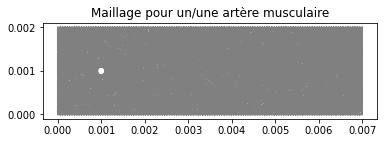

In [4]:
# On crée les géométries 
# dimension du domaine 10d *35d
channel = Rectangle(Point(0, 0), Point(longueur,hauteur)) # domaine total
cylinder = Circle(Point(xCercle, yCercle), D/2) # obstacle  on place à 5d de l'entrée et au milieu en terme de hauteur
domain = channel - cylinder ## opération de soustraction booléenne

# On crée le maillage
mesh = generate_mesh(domain, Finesse_maillage) # génération du maillage 

plot(mesh,title="Maillage pour un/une {}".format(type_vaiss))

#### Définition des espaces de résolutions

In [5]:
P2 = VectorElement("P", mesh.ufl_cell(), 2)
P1 = FiniteElement("P", mesh.ufl_cell(), 1)
TH = MixedElement([P2, P1])
Hh = FunctionSpace(mesh, TH)

#### Définition des conditions aux limites

In [6]:
def LeftEdge(x, on_boundary):
    return on_boundary and (abs(x[0] - 0) < tol)

def RightEdge(x, on_boundary):
    return on_boundary and (abs(x[0] - longueur) < tol)

def Walls(x, on_boundary): 
    return on_boundary and (abs(x[1] - hauteur) < tol) or (abs(x[1]-0)<tol)

def Cylinder(x,on_boundary):
    return (abs(x[0]-xCercle)**2+abs(x[1]-yCercle)**2)**0.5 <tol+0.5*D and on_boundary


# Velocity_initial= Expression(("U", "0.0"),
#                       degree=2, U=Vini)# profil uniforme
Velocity_initial=Expression(("2.0*U*x[1]*(H - x[1])/(H*H)", "0.0"),
                      degree=2, U=Vini,H=hauteur)# profil parabole

Velocity_null=Expression(("0.0","0.0"),degree=2)

Pressure_null=Constant(0.0)

BcWalls = DirichletBC(Hh.sub(0),Velocity_null,Walls) #vitesse nulle sur les "murs" 

BcCyl= DirichletBC(Hh.sub(0),Velocity_null,Cylinder) # et sur le caillot 

BcIni=DirichletBC(Hh.sub(0),Velocity_initial,LeftEdge) # vitesse initiale

# BcPnull=DirichletBC(Hh.sub(1),Pressure_null,RightEdge) # pas précontraint 

class Cyl(SubDomain):
    def inside(self, x, on_boundary):
        return (abs(x[0]-xCercle)**2+abs(x[1]-yCercle)**2)**0.5 <tol+0.5*D and on_boundary

bcN=Cyl()
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)# faut mettre dim-1
ds_cyl = Measure("ds", domain=mesh, subdomain_data=boundaries) # mesure pour l'obstacle



BCs=[BcWalls,BcIni,BcCyl]

#### Formulation variationnelle 

In [7]:
v, q = TestFunctions(Hh)
w = Function(Hh)
u, p = split(w)
a = Nu*inner(grad(u), grad(v))*dx + dot(dot(grad(u), u), v)*dx- p*div(v)*dx - q*div(u)*dx

#### Résolution

In [8]:
print("Début de résolution")
t1=t.time()
solve(a == 0, w, BCs)
print("résolution terminée en {} s".format(round(t.time()-t1,2)))
u, p = w.split()

Début de résolution
résolution terminée en 20.01 s


#### Visualisation

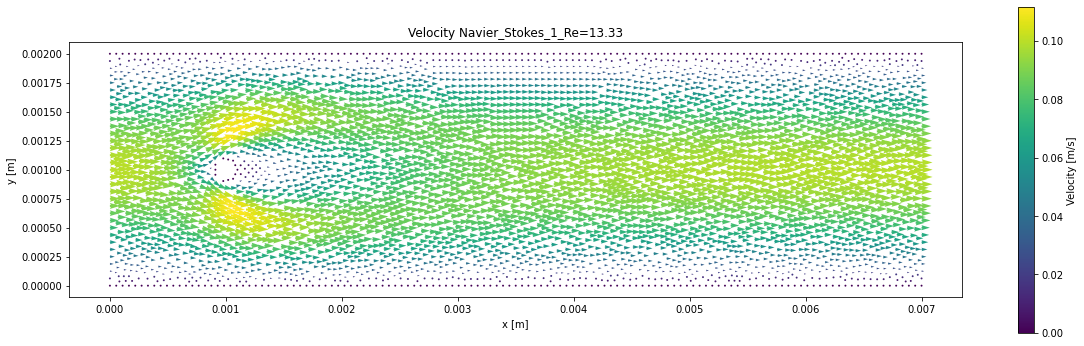

In [9]:
name="Navier_Stokes_1_Re={}".format(round(Re,2))
plt.figure(figsize=(20,6))
pl = plot(u, title='Velocity {}'.format(name))
plt.colorbar(pl,label="Velocity [m/s]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

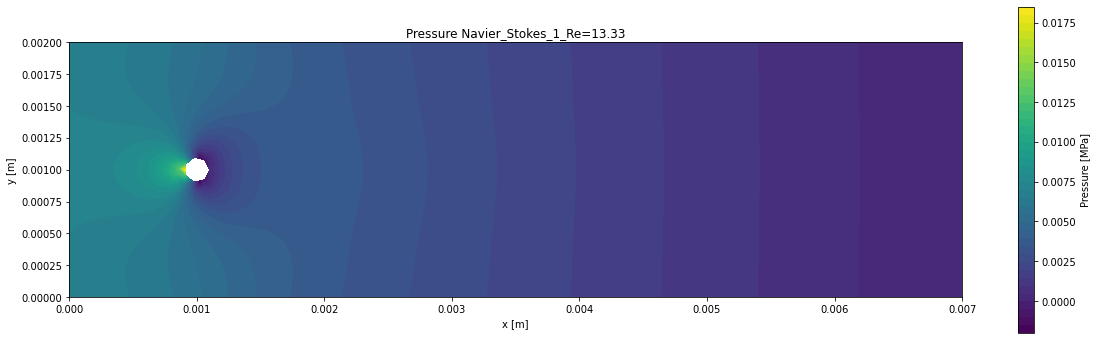

In [10]:
plt.figure(figsize=(20,6))
pl = plot(p, title='Pressure {}'.format(name))
plt.colorbar(pl,label="Pressure [MPa]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

_On notera que dans le cas présent, nous aurions pu exploiter les symétries de l'écoulement afin de ne réaliser la simulation que sur un domaine réduit, pour ensuite reconstruire l'écoulement total. Cependant, ici l'écoulement est simple, le domaine est petit, et ce n'est pas l'enjeu du projet. De plus on aurait pu réaliser un maillage plus fin au voisinage du caillot afin d'améliorer les performances du modèle, mais encore une fois ce n'est pas l'enjeu du projet en question._

#### étude de la traînée sur le caillot pour des nombres de reynolds compris en 5 et 50 

Début de résolution pour V= 0.05 m/s
résolution terminée en 10.8 s
Début de résolution pour V= 0.075 m/s
résolution terminée en 13.61 s
Début de résolution pour V= 0.1 m/s
résolution terminée en 13.1 s
Début de résolution pour V= 0.125 m/s
résolution terminée en 12.5 s
Début de résolution pour V= 0.15 m/s
résolution terminée en 13.31 s
Début de résolution pour V= 0.175 m/s
résolution terminée en 13.6 s
Début de résolution pour V= 0.2 m/s
résolution terminée en 13.5 s
Début de résolution pour V= 0.225 m/s
résolution terminée en 12.5 s
Début de résolution pour V= 0.25 m/s
résolution terminée en 13.6 s
Début de résolution pour V= 0.275 m/s
résolution terminée en 11.59 s
Début de résolution pour V= 0.3 m/s
résolution terminée en 13.29 s
Début de résolution pour V= 0.325 m/s
résolution terminée en 13.4 s
Début de résolution pour V= 0.35 m/s
résolution terminée en 12.39 s
Début de résolution pour V= 0.375 m/s
résolution terminée en 12.9 s
Début de résolution pour V= 0.4 m/s
résolution termin

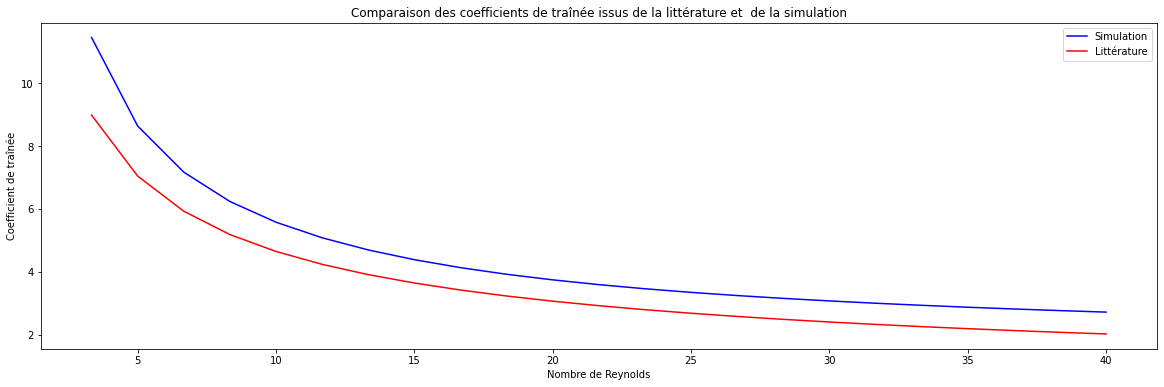

In [11]:
Re_c,Cd,Cd_L=[],[],[] # création des listes qui vont stocker le Reynolds, le Coefficient de traînée, et le coefficient de trainée issu de la littérature


for i in range(2,25):## Variation du reynolds 
    Vini_cd=2.5*i/100
    Re_c.append(Vini_cd*D/nu)
    
    Velocity_initial= Expression(("U", "0.0"),
                          degree=2, U=Vini_cd)# profil uniforme
    
    Velocity_null=Expression(("0.0","0.0"),degree=2)

    Pressure_null=Constant(0.0)

    BcWalls = DirichletBC(Hh.sub(0),Velocity_null,Walls) #vitesse nulle sur les "murs" 

    BcCyl= DirichletBC(Hh.sub(0),Velocity_null,Cylinder) # et sur le caillot 

    BcIni=DirichletBC(Hh.sub(0),Velocity_initial,LeftEdge) # vitesse initiale
    
    class Cyl(SubDomain):
        def inside(self, x, on_boundary):
            return (abs(x[0]-xCercle)**2+abs(x[1]-yCercle)**2)**0.5 <tol+0.5*D and on_boundary
    bcN=Cyl()
    boundaries = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)# faut mettre dim-1 que le 
    ds_cyl = Measure("ds", domain=mesh, subdomain_data=boundaries) 
    BCs=[BcWalls,BcIni,BcCyl]
    print("Début de résolution pour V= {} m/s".format(Vini_cd))
    t1=t.time()
    solve(a == 0, w, BCs)
    print("résolution terminée en {} s".format(round(t.time()-t1,2)))
    u, p = w.split()
    
    n = FacetNormal(w.function_space().mesh())
    force = -p*n + nu*dot(grad(u), n) #Calcul de la force 
    
    F_D = assemble(-force[0]*ds_cyl)# on prend la force sur notre obstacle selon x, la direction et sens d'écoulement 
    S_caillot=2*np.pi*D**2# surface référence ~ surface d'un cylindre court L=D pour la prise en compte du 2D
    
################################## Coefficient de traînée #################################
# Coefficient sans dimension, il caractérise les performances aérodynamiques du caillot
# Attention bien avoir en tête que ces derniers ne sont pas des constantes et dépendent de la géométrie du profil, 
#du Reynolds et de l'incidence du profil. 
    C_D=F_D*2/(rho*S_caillot*(Vini_cd**2))
    Cd_L.append(18.5/(Re_c[-1]**0.6))
    Cd.append(abs(C_D))
    
plt.figure(figsize=(20,6))
plt.plot(Re_c,Cd,color="b",label="Simulation")
plt.plot(Re_c,Cd_L,color="r",label="Littérature")
plt.title("Comparaison des coefficients de traînée issus de la littérature et  de la simulation")
plt.xlabel("Nombre de Reynolds")
plt.ylabel("Coefficient de traînée")
plt.legend()
plt.show()

#### étude de l'impact de l'angle d'incidence sur les champs de vitesse, pression et coefficient de traînée

Début de résolution pour V= 0.2 m/s
résolution terminée en 26.8 s


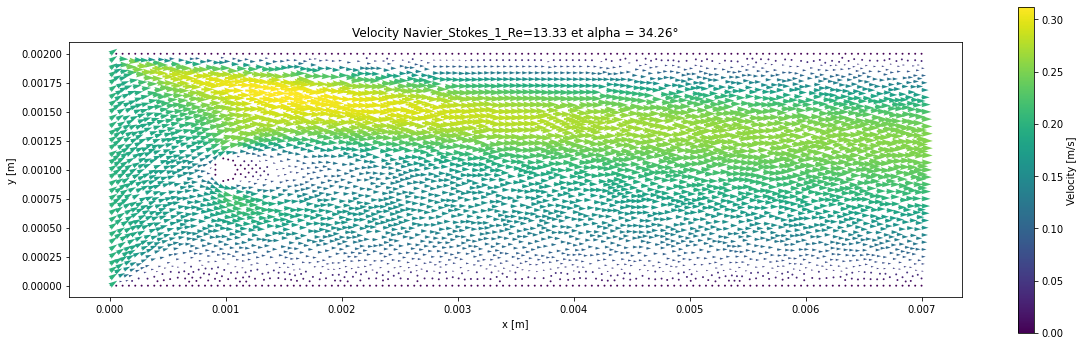

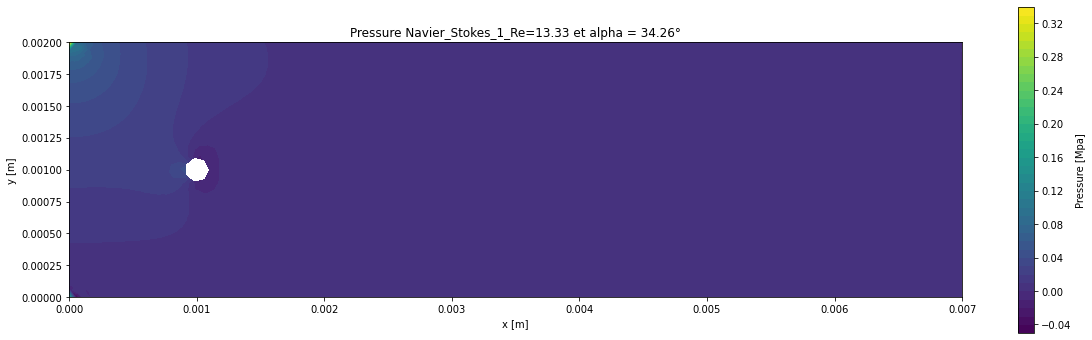

In [12]:
channel = Rectangle(Point(0, 0), Point(longueur,hauteur)) # domaine total
cylinder = Circle(Point(xCercle, yCercle), D/2) # obstacle  on place à 5d de l'entrée et au milieu en terme de hauteur
domain = channel - cylinder ## opération de soustraction booléenne

mesh = generate_mesh(domain, Finesse_maillage) # génération du maillage 

P2 = VectorElement("P", mesh.ufl_cell(), 2)
P1 = FiniteElement("P", mesh.ufl_cell(), 1)
TH = MixedElement([P2, P1])
Hh = FunctionSpace(mesh, TH)

alpha=rd.uniform(-np.pi/4,np.pi/4)# angle de vitesse initiale entre +-pi/4

Velocity_initial=Expression((str(Vini*np.cos(alpha)),str(Vini*np.sin(alpha))),degree=2)# profil uniforme
    
Velocity_null=Expression(("0.0","0.0"),degree=2)

Pressure_null=Constant(0.0)

BcWalls = DirichletBC(Hh.sub(0),Velocity_null,Walls) #vitesse nulle sur les "murs" 

BcCyl= DirichletBC(Hh.sub(0),Velocity_null,Cylinder) # et sur le caillot

BcIni=DirichletBC(Hh.sub(0),Velocity_initial,LeftEdge) # vitesse initiale

class Cyl(SubDomain):
        def inside(self, x, on_boundary):
            return (abs(x[0]-xCercle)**2+abs(x[1]-yCercle)**2)**0.5 <tol+0.5*D and on_boundary
bcN=Cyl()
boundaries = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)# faut mettre dim-1 que le 
ds_cyl = Measure("ds", domain=mesh, subdomain_data=boundaries)

BCs=[BcWalls,BcIni,BcCyl]

v, q = TestFunctions(Hh)
w = Function(Hh)
u, p = split(w)
a = Nu*inner(grad(u), grad(v))*dx + dot(dot(grad(u), u), v)*dx- p*div(v)*dx - q*div(u)*dx


print("Début de résolution pour V= {} m/s".format(Vini))
t1=t.time()
solve(a == 0, w, BCs)
print("résolution terminée en {} s".format(round(t.time()-t1,2)))
u, p = w.split()


name="Navier_Stokes_1_Re={} et alpha = {}°".format(round(Re,2),round(alpha*180/np.pi,2))
plt.figure(figsize=(20,6))
pl = plot(u, title='Velocity {}'.format(name))
plt.colorbar(pl,label="Velocity [m/s]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

plt.figure(figsize=(20,6))
pl = plot(p, title='Pressure {}'.format(name))
plt.colorbar(pl,label="Pressure [Mpa]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

Début de résolution pour V= 0.05 m/s
résolution terminée en 18.07 s
Début de résolution pour V= 0.075 m/s
résolution terminée en 12.8 s
Début de résolution pour V= 0.1 m/s
résolution terminée en 13.08 s
Début de résolution pour V= 0.125 m/s
résolution terminée en 12.58 s
Début de résolution pour V= 0.15 m/s
résolution terminée en 12.87 s
Début de résolution pour V= 0.175 m/s
résolution terminée en 14.9 s
Début de résolution pour V= 0.2 m/s
résolution terminée en 13.3 s
Début de résolution pour V= 0.225 m/s
résolution terminée en 12.36 s
Début de résolution pour V= 0.25 m/s
résolution terminée en 14.22 s
Début de résolution pour V= 0.275 m/s
résolution terminée en 12.06 s
Début de résolution pour V= 0.3 m/s
résolution terminée en 12.91 s
Début de résolution pour V= 0.325 m/s
résolution terminée en 13.46 s
Début de résolution pour V= 0.35 m/s
résolution terminée en 12.69 s
Début de résolution pour V= 0.375 m/s
résolution terminée en 11.99 s
Début de résolution pour V= 0.4 m/s
résolution 

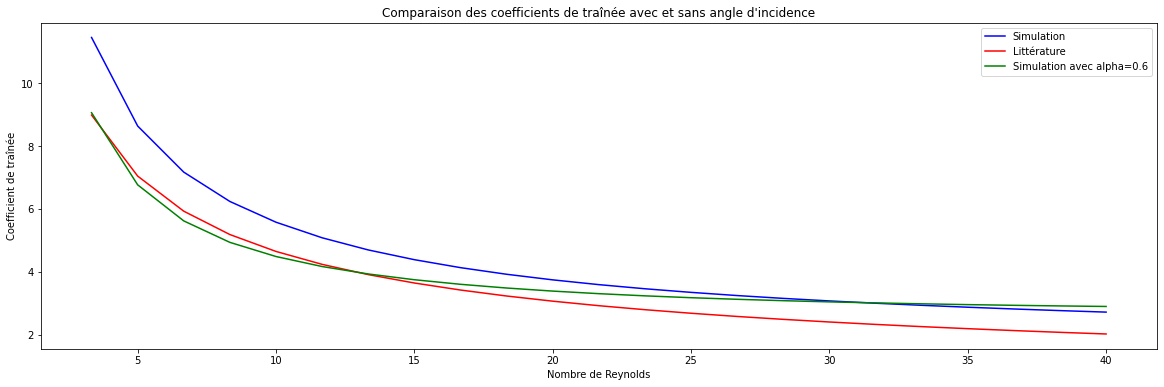

In [13]:
Re_c_alpha,Cd_alpha=[],[] # création des listes qui vont stocker le Reynolds, le Coefficient de traînée, et le coefficient de trainée issu de la littérature


for i in range(2,25):## Variation du reynolds 
    Vini_cd=2.5*i/100
    Re_c_alpha.append(Vini_cd*D/nu)
    
    Velocity_initial=Expression((str(Vini_cd*np.cos(alpha)),str(Vini_cd*np.sin(alpha))),degree=2)# profil uniforme
    
    Velocity_null=Expression(("0.0","0.0"),degree=2)

    Pressure_null=Constant(0.0)

    BcWalls = DirichletBC(Hh.sub(0),Velocity_null,Walls) #vitesse nulle sur les "murs" 

    BcCyl= DirichletBC(Hh.sub(0),Velocity_null,Cylinder) # et sur le caillot 

    BcIni=DirichletBC(Hh.sub(0),Velocity_initial,LeftEdge) # vitesse initiale

    class Cyl(SubDomain):
        def inside(self, x, on_boundary):
            return (abs(x[0]-xCercle)**2+abs(x[1]-yCercle)**2)**0.5 <tol+0.5*D and on_boundary
    bcN=Cyl()
    boundaries = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)# faut mettre dim-1 que le 
    ds_cyl = Measure("ds", domain=mesh, subdomain_data=boundaries)

    BCs=[BcWalls,BcIni,BcCyl]
    print("Début de résolution pour V= {} m/s".format(Vini_cd))
    t1=t.time()
    solve(a == 0, w, BCs)
    print("résolution terminée en {} s".format(round(t.time()-t1,2)))
    u, p = w.split()
    
    n = FacetNormal(w.function_space().mesh())
    force = -p*n + nu*dot(grad(u), n) #Calcul de la force 
    
    F_D = assemble(-force[0]*ds_cyl)# on prend la force sur notre obstacle selon x, la direction et sens d'écoulement 
    
    S_caillot=(2*np.pi*(D)**2)#surface de référence 
    
################################## Coefficient de traînée #################################
# Coefficient sans dimension, il caractérise les performances aérodynamiques du caillot
# Attention bien avoir en tête que ces derniers ne sont pas des constantes et dépendent de la géométrie du profil, du Reynolds et de l'incidence du profil. 
    C_D=F_D*2/(rho*S_caillot*(Vini_cd**2))
    Cd_alpha.append(abs(C_D))

plt.figure(figsize=(20,6))
plt.plot(Re_c,Cd,color="b",label="Simulation")
plt.plot(Re_c,Cd_L,color="r",label="Littérature")
plt.plot(Re_c_alpha,Cd_alpha,color="green",label="Simulation avec alpha={}".format(round(alpha,2)))
plt.title("Comparaison des coefficients de traînée avec et sans angle d'incidence")
plt.xlabel("Nombre de Reynolds")
plt.ylabel("Coefficient de traînée")
plt.legend()
plt.show()

### b)  Passage à l'étude de multiple caillots
#### Définition des constantes du problème & des variables aléatoires

In [14]:
print("Choisir le nombre de caillot")
caillot=wg.IntSlider(value=4,min=2,max=10,step=1)
display(caillot)

Choisir le nombre de caillot


IntSlider(value=4, max=10, min=2)

In [15]:
# Conditions aléatoires : Rayon des caillots, Coordonnées des caillots dans le vaisseau
# Variables : choix du nombre de caillots via le slider
longueur=35*D
hauteur=10*D

N=caillot.value # Nombre de caillot 
xCercles,yCercles,rCercles=[],[],[]
for n in range(0,N) : 
    yCercles.append(rd.uniform(D,hauteur-D))
    xCercles.append(rd.uniform(5*D,10*D))
    rCercles.append(rd.uniform(0.8*D/2,1.2*D/2))

#### Définition du domaine

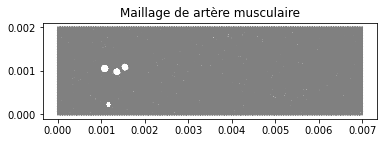

In [16]:
# On crée les géométries 
channel = Rectangle(Point(0, 0), Point(longueur,hauteur)) # domaine total

domain=channel
for n in range(0,N) : 
    domain-=Circle(Point(xCercles[n],yCercles[n]),rCercles[n])

mesh = generate_mesh(domain, Finesse_maillage) # génération du maillage 

plot(mesh,title="Maillage de {}".format(type_vaiss))

#### Définition des espaces de résolutions

In [17]:
P2 = VectorElement("P", mesh.ufl_cell(), 2)
P1 = FiniteElement("P", mesh.ufl_cell(), 1)
TH = MixedElement([P2, P1])
Hh = FunctionSpace(mesh, TH)

#### Définition des conditions aux limites

In [18]:
# définition des boundaries conditions à l'entrée

def LeftEdge(x, on_boundary):
    return on_boundary and (abs(x[0] - 0) < tol)

def RightEdge(x, on_boundary):
    return on_boundary and (abs(x[0] - longueur) < tol)

def Walls(x, on_boundary): 
    return on_boundary and (abs(x[1] - hauteur) < tol) or (abs(x[1]-0)<tol)


Velocity_initial=Expression((str(Vini),0),degree=2)# profil uniforme

Velocity_null=Expression(("0.0","0.0"),degree=2)

Pressure_null=Constant(0.0)

BcIni=DirichletBC(Hh.sub(0),Velocity_initial,LeftEdge) # vitesse initiale
BcPnull=DirichletBC(Hh.sub(1),Pressure_null,RightEdge) # pas précontraint 
BcWalls = DirichletBC(Hh.sub(0),Velocity_null,Walls) #vitesse nulle sur les "murs" 


BCs=[BcIni,BcWalls,BcPnull]
for n in range(0,N) : 
    def Cyl_n(x,on_boundary):
        return (abs(x[0]-xCercles[n])**2+abs(x[1]-yCercles[n])**2)**0.5 <tol+rCercles[n] and on_boundary
    Condi=DirichletBC(Hh.sub(0),Velocity_null,Cyl_n) # et sur les caillots
    BCs.append(Condi)

#### Formulation variationnelle 

In [19]:
v, q = TestFunctions(Hh)
w = Function(Hh)
u, p = split(w)
a = Nu*inner(grad(u), grad(v))*dx + dot(dot(grad(u), u), v)*dx- p*div(v)*dx - q*div(u)*dx

#### Résolution

In [20]:
print("Début de résolution")
t2=t.time()
solve(a == 0, w, BCs)
print("résolution terminée en {} s".format(round(t.time()-t2,2)))
u, p = w.split()

Début de résolution
résolution terminée en 31.2 s


#### Visualisation

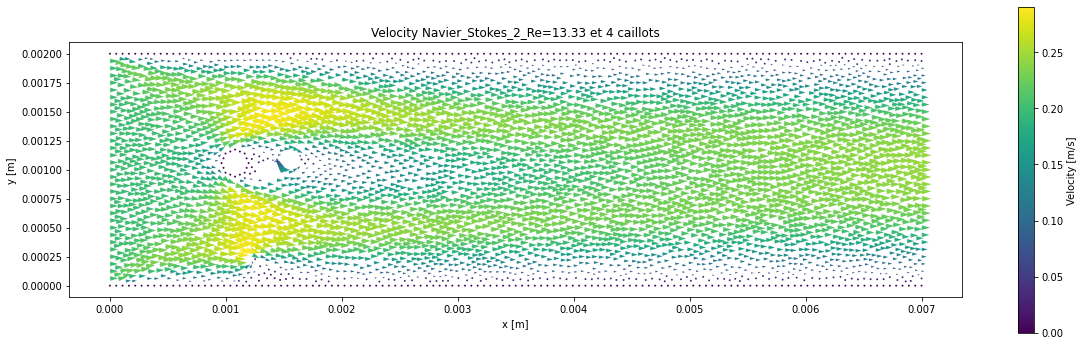

In [21]:
name="Navier_Stokes_2_Re={} et {} caillots".format(round(Re,2),N)
plt.figure(figsize=(20,6))
pl = plot(u, title='Velocity {}'.format(name))
plt.colorbar(pl,label="Velocity [m/s]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

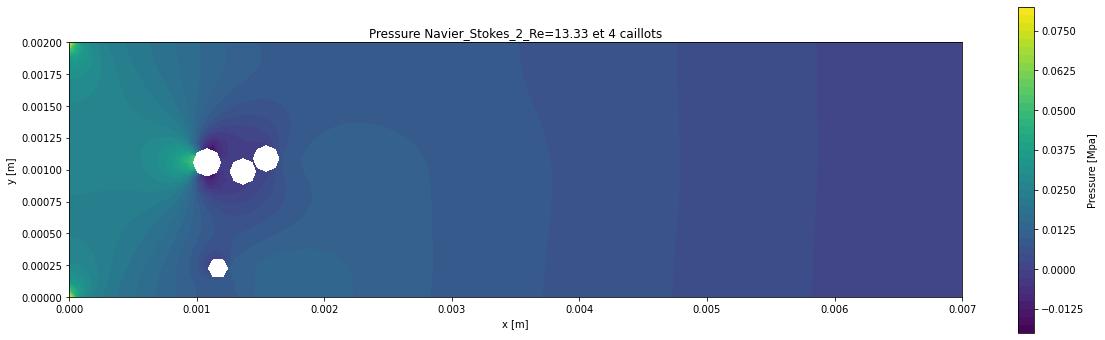

In [22]:
plt.figure(figsize=(20,6))
pl = plot(p, title='Pressure {}'.format(name))
plt.colorbar(pl,label="Pressure [Mpa]")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

## 5. Interprétation des résultats

La première étude vise à mettre en exergue la perturbation de l'écoulement du sang lorsqu'un vaisseau est obstrué par la présence d'un caillot. On peut remarquer qu'avec une vitesse initiale selon x l'écoulement est symétrique. Nous avons également pu mettre en avant la pertinence du résultat de l'étude avec l'observation de la cohérence du coefficient de traînée avec ce qu'on peut trouver dans la littérature. L'écart entre notre simulation et les résultats de littérature s'explique par toutes nos hypothèses ainsi que la finesse du maillage et l'espace de résolution. Cependant la tendance et les ordres de grandeurs sont cohérents. Par ailleurs, nous avons pu apprécier l'impact que pouvait avoir l'angle de la vitesse d'incidence sur le caillot, ce qui pourrait par exemple simuler une pression sur le vaisseau sanguin étudié. 

La seconde étude quant à elle met en regard l'effet de la présence de plusieurs caillots ainsi que l'influence de la présence de ces derniers sur la circulation sanguine. En effet, plus la distance qui les sépare est faible plus les turbulences engendrées par les caillots "intéragissent". Aussi, plus le nombre de caillot augmente plus l'écoulement est perturbé, ce qui peut causer des lésions.

On notera que, par le biais des similitudes, on peut adapter ce problème à d'autres problèmes physiques présentant des Reynolds faibles. 

## 6. Conclusion 
D'une manière générale, on peut apprécier visuellement et quantitativement la perturbation engendrée par les caillots sur l'écoulement sanguin. Le caractère aléatoire portant sur l'orientation de la vitesse initiale permet de voir l'impact d'une compression sur une veine, et de constater que cela a un impact considérable sur l'écoulement. De plus, la distance entre les caillots a un impact certain, ainsi que le nombre de caillots. Enfin, je tiens à souligner qu'il s'agit ici d'une étude très simpliste au regard de la complexité des phénomènes mis en jeu. En effet, j'ai émis beaucoup d'hypothèse, la principale étant l'écoulement 2D. Il existe de nombreux comportement de bords, c'est pourquoi on a pris l'hypothèse d'en être éloignés.

L'étude des écoulements sanguins fait l'objet d'énormément de sujet de recherche. Des modélisations bien plus complexes existent, qui permettent notamment de simuler la contraction de l'artère, ce qui se traduit par un domaine à géométrie variable dans le temps et l'espace, comme on peut le voir sous l'image ci-dessous. 


<img src="Files/conclusion.PNG" width="400" height="200">

<img src="Files/sanghomme.jpg" width="300" height="150">



## 7. Références bibliographiques
- https://fenicsproject.org/qa/9617/2d-boundary-condition/
- https://fenicsproject.org/olddocs/dolfin/1.3.0/python/demo/documented/stokes-iterative/python/documentation.html
- https://fenicsproject.org/olddocs/dolfin/1.3.0/python/demo/documented/stokes-mini/python/documentation.html
- https://github.com/hplgit/fenics-tutorial/blob/master/pub/python/vol1/ft07_navier_stokes_channel.py
- https://fenicsproject.org/pub/tutorial/html/._ftut1009.html
- https://fenicsproject.org/pub/book/book/fenics-book-2011-06-14.pdf 
- http://www.math.iitb.ac.in/~neela/CIMPA/notes/variational%20methods%20for%20CFD.pdf
- Erick Herbin, Paulin Lafitte "Convergence, integration, probability and Partial differential equations" Département mathématiques, CentraleSupelec
- Eric Bonel, "énergétique intermédiaire, mécanique des fluides", Arts et Métiers ParisTech
- https://hal.inria.fr/hal-00926273/document
- https://tel.archives-ouvertes.fr/tel-00923731/document